In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [11]:
diabetes=datasets.load_diabetes()
print(diabetes.__class__)
type(diabetes)

<class 'sklearn.utils._bunch.Bunch'>


sklearn.utils._bunch.Bunch

In [13]:
df=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df["target"]=diabetes.target

In [15]:
print(df.head())
print(df.info())
print(df.describe())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp

In [17]:
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


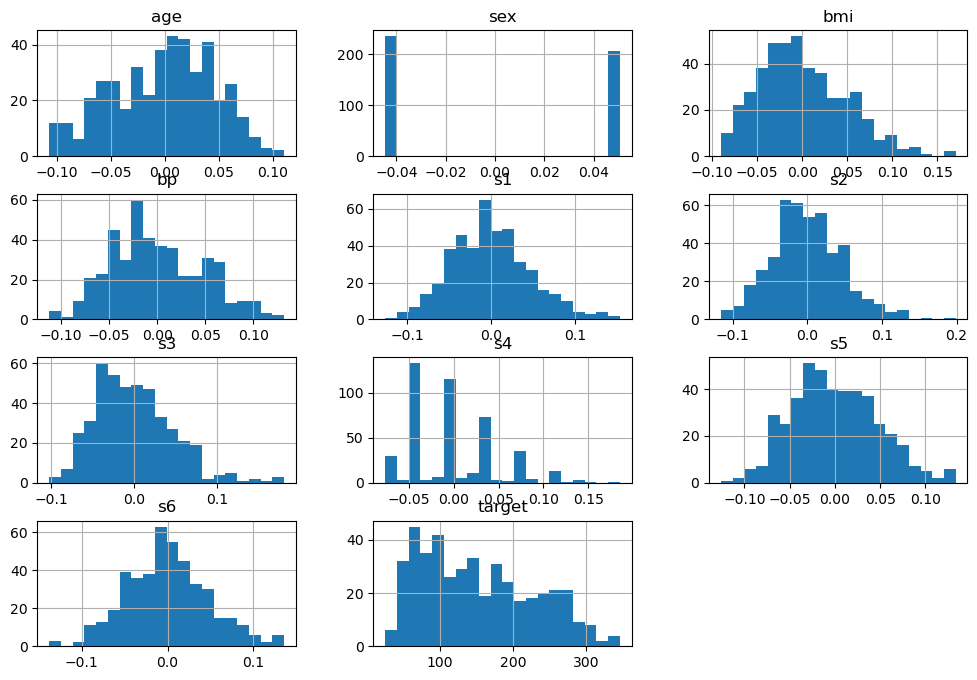

In [19]:
df.hist(figsize=(12,8),bins=20)
plt.show()

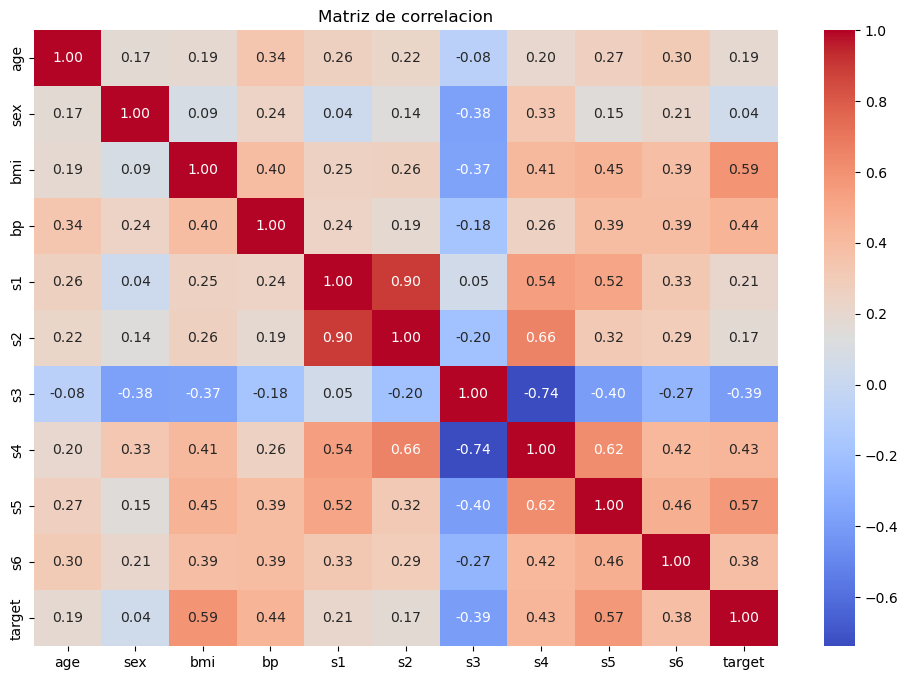

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlacion")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["target"])
y=df["target"]

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (353, 10)
Tamaño del conjunto de prueba: (89, 10)


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression

modelo=LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes del modelo: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Intercepto: 153.73654390934846


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(X_test_scaled)

mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Cuadrático Medio (MSE): 2900.19
Coeficiente de Determinación (R²): 0.45


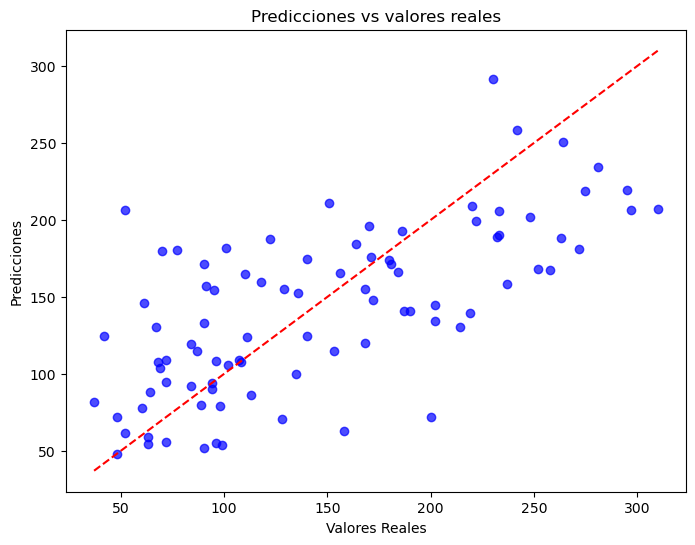

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()],"--", color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs valores reales")
plt.show()

In [53]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=0.01)
ridge = Ridge(alpha=0.01)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

lasso_score=lasso.score(X_test, y_test)
ridge_score=ridge.score(X_test, y_test)

print(f"Lasso R^2 Score: {lasso_score}")
print(f"Ridge R^2 Score: {ridge_score}")

Lasso R^2 Score: 0.45668611945806237
Ridge R^2 Score: 0.4559819504579107


In [55]:
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.1,1,10,100]}

# Usar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(Ridge(), parameters, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el rendimiento
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R^2 Score: {grid_search.best_score_}")


Best Parameters: {'alpha': 0.1}
Best R^2 Score: 0.45647798015266466


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Entrenar Random Forest y SVR
rf = RandomForestRegressor(n_estimators=100)
svr = SVR(kernel='linear')

# Ajustar los modelos
rf.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Evaluar el rendimiento en el conjunto de prueba
rf_score = rf.score(X_test, y_test)
svr_score = svr.score(X_test, y_test)

print(f"Random Forest R^2 Score: {rf_score}")
print(f"SVR R^2 Score: {svr_score}")


Random Forest R^2 Score: 0.44747395626432984
SVR R^2 Score: 0.020339939398460127


In [59]:
import joblib

# Guardar el modelo entrenado (en este caso el mejor modelo obtenido)
joblib.dump(rf, 'diabetes_regression_model.pkl')

# Para cargar el modelo en el futuro:
# model = joblib.load('diabetes_regression_model.pkl')


['diabetes_regression_model.pkl']